In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
#check for duplication
df.duplicated().sum()

0

<Axes: xlabel='Outcome', ylabel='count'>

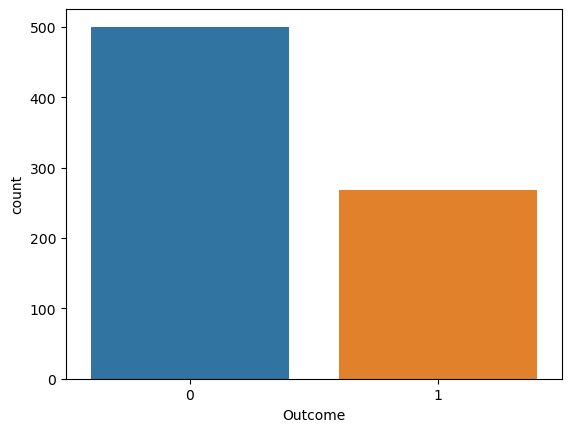

In [5]:
sns.countplot(x =  'Outcome', data = df)

In [6]:
y = df.Outcome
x = df.drop('Outcome', axis = 1)

In [7]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [8]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [10]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)

## **1- KNeighborsClassifier**

In [13]:
knn_model = KNeighborsClassifier()
params = {
    'n_neighbors' : list(range(1,25)),
    'p' :[1,2],
    'weights' :['uniform', 'distance']
}

grid_search = GridSearchCV(knn_model, params, cv = 5 )
#fit grid_search
grid_search.fit(x_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)

{'n_neighbors': 18, 'p': 1, 'weights': 'uniform'}
0.7394242303078769


In [14]:
knn_model = KNeighborsClassifier(n_neighbors = 18, p = 1, weights = 'uniform')
knn_model.fit(x_train, y_train)
#predict on test data
knn_pred = knn_model.predict(x_test)
#predict on train data
train_knn_pred = knn_model.predict(x_train)
print("Testing Classification Report of KNeighborsClassifier : ")
print(classification_report(y_test, knn_pred))
print("Training Classification Report of KNeighborsClassifier : ")
print(classification_report(y_train, train_knn_pred))

Testing Classification Report of KNeighborsClassifier : 
              precision    recall  f1-score   support

           0       0.82      0.92      0.87       107
           1       0.74      0.55      0.63        47

    accuracy                           0.81       154
   macro avg       0.78      0.73      0.75       154
weighted avg       0.80      0.81      0.80       154

Training Classification Report of KNeighborsClassifier : 
              precision    recall  f1-score   support

           0       0.77      0.91      0.84       393
           1       0.77      0.53      0.63       221

    accuracy                           0.77       614
   macro avg       0.77      0.72      0.73       614
weighted avg       0.77      0.77      0.76       614



## **2- GaussianNB**

In [16]:
nb_model = GaussianNB()
params = {
   'var_smoothing' : np.logspace(0,-2, num = 100)
}

grid_search = GridSearchCV(nb_model, params, cv = 5 )
#fit grid_search
grid_search.fit(x_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)

{'var_smoothing': 0.011497569953977356}
0.7442889510862322


In [17]:
nb_model = GaussianNB(var_smoothing = 0.011497569953977356)
nb_model.fit(x_train, y_train)
#predict on test data
nb_pred = nb_model.predict(x_test)
#predict on train data
train_nb_pred = nb_model.predict(x_train)

print("Testing Classification Report of GaussianNB : ")
print(classification_report(y_test, nb_pred))
print("Training Classification Report of GaussianNB : ")
print(classification_report(y_train, train_nb_pred))

Testing Classification Report of GaussianNB : 
              precision    recall  f1-score   support

           0       0.79      0.91      0.84       107
           1       0.68      0.45      0.54        47

    accuracy                           0.77       154
   macro avg       0.73      0.68      0.69       154
weighted avg       0.75      0.77      0.75       154

Training Classification Report of GaussianNB : 
              precision    recall  f1-score   support

           0       0.76      0.91      0.83       393
           1       0.74      0.49      0.59       221

    accuracy                           0.76       614
   macro avg       0.75      0.70      0.71       614
weighted avg       0.75      0.76      0.74       614



## **3- LogisticRegression**

In [22]:
lr_model = LogisticRegression()
params = {
    'penalty' : ['l1', 'l2', 'elasticnet'],
    'C' : [1.0, 0.1, 0.01, 0.001],
    'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']
}

grid_search = GridSearchCV(lr_model, params, cv = 5 )
#fit grid_search
grid_search.fit(x_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)

{'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.7622817539650806


In [23]:
lr_model = LogisticRegression(C = 0.1, penalty = 'l2', solver = 'lbfgs')
lr_model.fit(x_train, y_train)
#predict on test data
lr_pred = lr_model.predict(x_test)
#predict on train data
train_lr_pred = lr_model.predict(x_train)

print("Testing Classification Report of LogisticRegression : ")
print(classification_report(y_test, lr_pred))
print("Training Classification Report of LogisticRegression : ")
print(classification_report(y_train, train_lr_pred))

Testing Classification Report of LogisticRegression : 
              precision    recall  f1-score   support

           0       0.84      0.91      0.87       107
           1       0.74      0.62      0.67        47

    accuracy                           0.82       154
   macro avg       0.79      0.76      0.77       154
weighted avg       0.81      0.82      0.81       154

Training Classification Report of LogisticRegression : 
              precision    recall  f1-score   support

           0       0.79      0.87      0.83       393
           1       0.72      0.58      0.64       221

    accuracy                           0.77       614
   macro avg       0.75      0.72      0.73       614
weighted avg       0.76      0.77      0.76       614



## **4- SVM Model**

In [28]:
svm_model = SVC() 
params = {
    'kernel' : ['linear', 'rbf', 'poly', 'sigmoid'],
    'C' : [1.0, 0.1, 0.01, 0.001],
}

grid_search = GridSearchCV(svm_model, params, cv = 5 )
#fit grid_search
grid_search.fit(x_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)

{'C': 1.0, 'kernel': 'linear'}
0.759016393442623


In [29]:
svm_model = SVC(kernel = 'linear', C = 1.0) 
svm_model.fit(x_train, y_train)
#predict on test data
svm_pred = svm_model.predict(x_test)
#predict on train data
train_svm_pred = svm_model.predict(x_train)

print("Testing Classification Report of SVC : ")
print(classification_report(y_test, svm_pred))
print("Training Classification Report of SVC : ")
print(classification_report(y_train, train_svm_pred))

Testing Classification Report of SVC : 
              precision    recall  f1-score   support

           0       0.84      0.91      0.87       107
           1       0.74      0.62      0.67        47

    accuracy                           0.82       154
   macro avg       0.79      0.76      0.77       154
weighted avg       0.81      0.82      0.81       154

Training Classification Report of SVC : 
              precision    recall  f1-score   support

           0       0.78      0.87      0.83       393
           1       0.72      0.57      0.64       221

    accuracy                           0.77       614
   macro avg       0.75      0.72      0.73       614
weighted avg       0.76      0.77      0.76       614



## **5- DecisionTreeClassifier**

In [32]:
dt_model = DecisionTreeClassifier()
params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [5,10,20,25],
    'min_samples_leaf' : [10,20,30,40]
}

grid_search = GridSearchCV(dt_model, params, cv = 5 )
#fit grid_search
grid_search.fit(x_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 30}
0.7393975743036119


In [33]:
dt_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 5, min_samples_leaf = 30)
dt_model.fit(x_train, y_train)
#predict on test data
dt_pred = dt_model.predict(x_test)
#predict on train data
train_dt_pred = dt_model.predict(x_train)

print("Testing Classification Report of DecisionTreeClassifier : ")
print(classification_report(y_test, dt_pred))
print("Training Classification Report of DecisionTreeClassifier : ")
print(classification_report(y_train, train_dt_pred))

Testing Classification Report of DecisionTreeClassifier : 
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       107
           1       0.68      0.64      0.66        47

    accuracy                           0.80       154
   macro avg       0.76      0.75      0.76       154
weighted avg       0.80      0.80      0.80       154

Training Classification Report of DecisionTreeClassifier : 
              precision    recall  f1-score   support

           0       0.83      0.84      0.83       393
           1       0.71      0.68      0.70       221

    accuracy                           0.79       614
   macro avg       0.77      0.76      0.76       614
weighted avg       0.78      0.79      0.78       614



## **6- RandomForestClassifier**

In [36]:
rf_model = RandomForestClassifier()
params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [5,10,20,25],
    'min_samples_leaf' : [10,20,30,40],
    'n_estimators' : [20,30,50,40,10,100]
}

grid_search = GridSearchCV(rf_model, params, cv = 5 )
#fit grid_search
grid_search.fit(x_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'gini', 'max_depth': 25, 'min_samples_leaf': 20, 'n_estimators': 20}
0.7720245235239237


In [37]:
rf_model = RandomForestClassifier(criterion = 'gini', max_depth = 25, 
                                  min_samples_leaf = 20,
                                 n_estimators = 20)
rf_model.fit(x_train, y_train)
#predict on terf_modelst data
rf_pred = rf_model.predict(x_test)
#predict on train data
train_rf_pred = rf_model.predict(x_train)

print("Testing Classification Report of RandomForestClassifier : ")
print(classification_report(y_test, rf_pred))
print("Training Classification Report of RandomForestClassifier : ")
print(classification_report(y_train, train_rf_pred))

Testing Classification Report of RandomForestClassifier : 
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       107
           1       0.69      0.57      0.63        47

    accuracy                           0.79       154
   macro avg       0.76      0.73      0.74       154
weighted avg       0.79      0.79      0.79       154

Training Classification Report of RandomForestClassifier : 
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       393
           1       0.77      0.63      0.69       221

    accuracy                           0.80       614
   macro avg       0.79      0.76      0.77       614
weighted avg       0.80      0.80      0.79       614



## **Example 2**

In [38]:
df = pd.read_csv("RF_Data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [40]:
df.drop(['id', 'Unnamed: 32'], axis = 1, inplace = True)

In [41]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [42]:
M = df[df.diagnosis == 'M']
B = df[df.diagnosis == 'B']

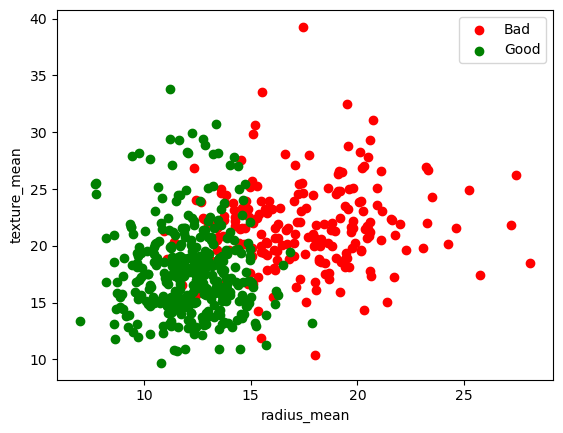

In [43]:
plt.scatter(M.radius_mean, M.texture_mean, color = 'red', label = 'Bad')
plt.scatter(B.radius_mean, B.texture_mean, color = 'green', label = 'Good')
plt.xlabel("radius_mean")
plt.ylabel("texture_mean")
plt.legend()
plt.show()

In [44]:
y = df.diagnosis
x = df.drop('diagnosis', axis = 1)

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state = 0)

In [47]:
rf_model = RandomForestClassifier()
params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [5,10,20,25],
    'min_samples_leaf' : [10,20,30,40],
    'n_estimators' : [20,30,50,40,10,100]
}
grid_search = GridSearchCV(rf_model, params, cv = 5 )
#fit grid_search
grid_search.fit(x_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 10, 'n_estimators': 100}
0.9507250341997265


In [48]:
rf_model = RandomForestClassifier(criterion = 'entropy', max_depth = 10,
                                 min_samples_leaf = 10 , n_estimators = 100)
rf_model.fit(x_train, y_train)

#predict on terf_modelst data
rf_pred = rf_model.predict(x_test)
#predict on train data
train_rf_pred = rf_model.predict(x_train)

print("Testing Classification Report of RandomForestClassifier : ")
print(classification_report(y_test, rf_pred))
print("Training Classification Report of RandomForestClassifier : ")
print(classification_report(y_train, train_rf_pred))

Testing Classification Report of RandomForestClassifier : 
              precision    recall  f1-score   support

           B       0.98      0.96      0.97        90
           M       0.93      0.96      0.94        53

    accuracy                           0.96       143
   macro avg       0.95      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143

Training Classification Report of RandomForestClassifier : 
              precision    recall  f1-score   support

           B       0.97      0.99      0.98       267
           M       0.97      0.95      0.96       159

    accuracy                           0.97       426
   macro avg       0.97      0.97      0.97       426
weighted avg       0.97      0.97      0.97       426



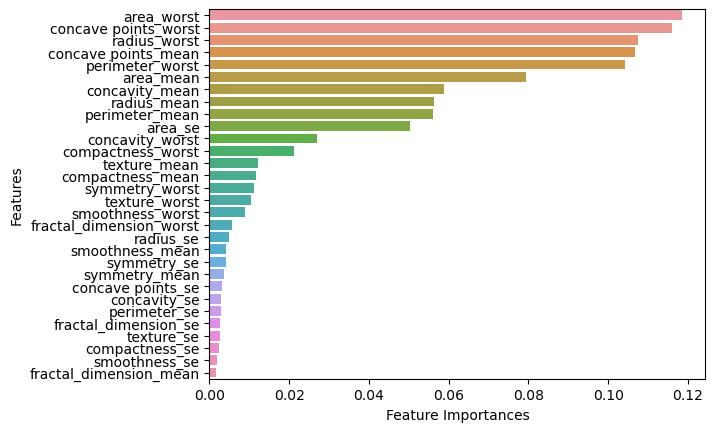

In [51]:
feature_scores = pd.Series(rf_model.feature_importances_,
                          index = x_train.columns).sort_values(ascending = False)

sns.barplot(x = feature_scores, y = feature_scores.index)
plt.xlabel("Feature Importances")
plt.ylabel("Features")
plt.show()

## **Example 3**

In [52]:
df = pd.read_csv("insurance_claims.csv")
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [54]:
df.replace('?', np.nan, inplace = True)
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,NaN,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [55]:
df.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [56]:
df['collision_type'].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
Name: collision_type, dtype: int64

In [57]:
#fill missing values in collision_type column
#df['collision_type'] = df['collision_type'].fillna("Rear Collision")
df['collision_type'] = df['collision_type'].fillna(df['collision_type'].mode()[0])

In [58]:
df['collision_type'].value_counts()

Rear Collision     470
Side Collision     276
Front Collision    254
Name: collision_type, dtype: int64

In [59]:
df['property_damage'].value_counts()

NO     338
YES    302
Name: property_damage, dtype: int64

In [60]:
#fill missing values in property_damage column
df['property_damage'] = df['property_damage'].fillna(df['property_damage'].mode()[0])
df['property_damage'].value_counts()

NO     698
YES    302
Name: property_damage, dtype: int64

In [61]:
df['police_report_available'].value_counts()

NO     343
YES    314
Name: police_report_available, dtype: int64

In [62]:
df['police_report_available'] = df['police_report_available'].fillna(df['police_report_available'].mode()[0])

In [63]:
df['police_report_available'].value_counts()

NO     686
YES    314
Name: police_report_available, dtype: int64

In [64]:
df.drop('_c39', axis = 1, inplace = True)

In [65]:
df.isna().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [66]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [67]:
#drop unnecessary columns
drop_list = ['policy_number', 'policy_bind_date', 'policy_state', 'insured_zip', 'incident_location',
            'incident_date', 'incident_state', 'incident_city', 'insured_hobbies',
            'auto_make','auto_model', 'auto_year']

In [68]:
df.drop(drop_list, axis = 1, inplace = True)

In [69]:
df.head()

,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,48,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,...,1,YES,1,2,YES,71610,6510,13020,52080,Y
1,228,42,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,...,1,NO,0,0,NO,5070,780,780,3510,Y
2,134,29,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,...,3,NO,2,3,NO,34650,7700,3850,23100,N
3,256,41,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,...,1,NO,1,2,NO,63400,6340,6340,50720,Y
4,228,44,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,...,1,NO,0,1,NO,6500,1300,650,4550,N


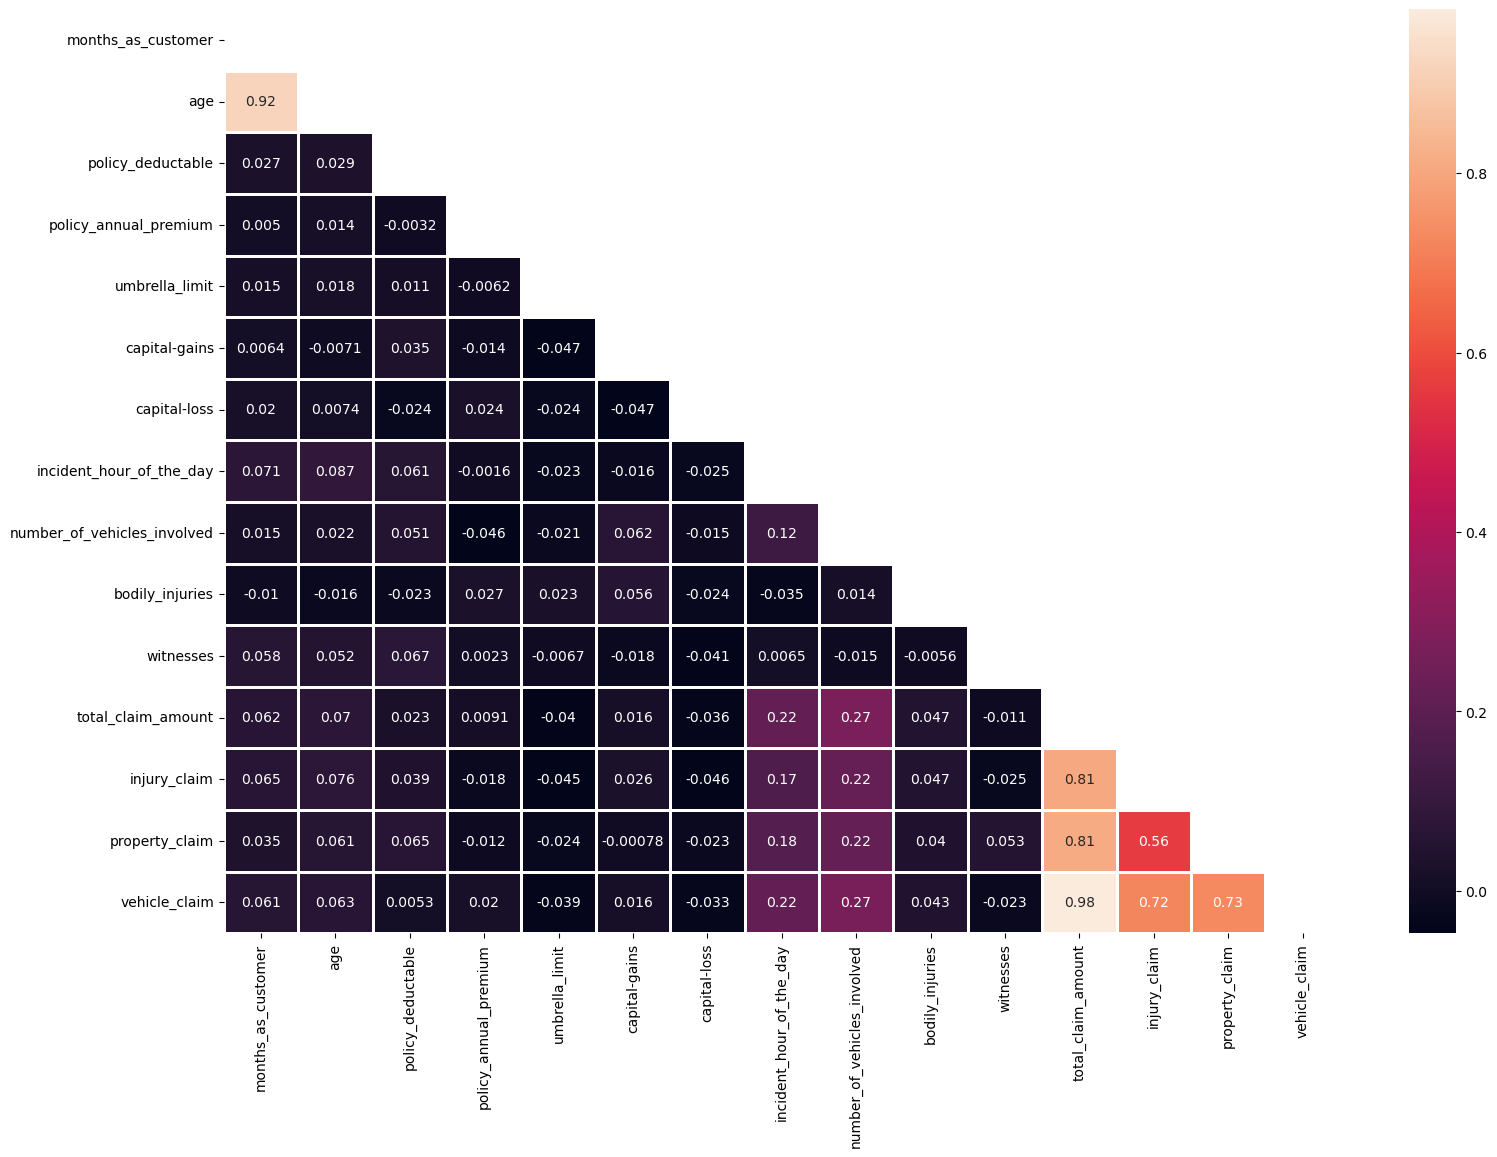

In [71]:
#check for correlation
plt.figure(figsize = (18,12))
corr = df.corr(numeric_only = True)
mask = np.triu(np.ones_like(corr, dtype = bool))
sns.heatmap(data = corr, mask = mask, annot = True, fmt = '.2g', linewidth = 1)
plt.show()

In [72]:
df.drop(columns = ['age', 'total_claim_amount'], axis = 1, inplace = True)
df.head()

,months_as_customer,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,...,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,53300,...,5,1,YES,1,2,YES,6510,13020,52080,Y
1,228,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,0,...,8,1,NO,0,0,NO,780,780,3510,Y
2,134,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,35100,...,7,3,NO,2,3,NO,7700,3850,23100,N
3,256,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,48900,...,5,1,NO,1,2,NO,6340,6340,50720,Y
4,228,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,66000,...,20,1,NO,0,1,NO,1300,650,4550,N


In [73]:
df['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

In [74]:
y = df['fraud_reported']
x = df.drop('fraud_reported', axis = 1)

In [75]:
y.head()

0    Y
1    Y
2    N
3    Y
4    N
Name: fraud_reported, dtype: object

In [76]:
x.head()

,months_as_customer,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,...,authorities_contacted,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim
0,328,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,53300,...,Police,5,1,YES,1,2,YES,6510,13020,52080
1,228,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,0,...,Police,8,1,NO,0,0,NO,780,780,3510
2,134,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,35100,...,Police,7,3,NO,2,3,NO,7700,3850,23100
3,256,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,48900,...,Police,5,1,NO,1,2,NO,6340,6340,50720
4,228,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,66000,...,None,20,1,NO,0,1,NO,1300,650,4550


In [77]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   policy_csl                   1000 non-null   object 
 2   policy_deductable            1000 non-null   int64  
 3   policy_annual_premium        1000 non-null   float64
 4   umbrella_limit               1000 non-null   int64  
 5   insured_sex                  1000 non-null   object 
 6   insured_education_level      1000 non-null   object 
 7   insured_occupation           1000 non-null   object 
 8   insured_relationship         1000 non-null   object 
 9   capital-gains                1000 non-null   int64  
 10  capital-loss                 1000 non-null   int64  
 11  incident_type                1000 non-null   object 
 12  collision_type               1000 non-null   object 
 13  incident_severity  

In [78]:
#select categorical data
categorical_df = x.select_dtypes(include = ['object'])
categorical_df.head()

,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,property_damage,police_report_available
0,250/500,MALE,MD,craft-repair,husband,Single Vehicle Collision,Side Collision,Major Damage,Police,YES,YES
1,250/500,MALE,MD,machine-op-inspct,other-relative,Vehicle Theft,Rear Collision,Minor Damage,Police,NO,NO
2,100/300,FEMALE,PhD,sales,own-child,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NO,NO
3,250/500,FEMALE,PhD,armed-forces,unmarried,Single Vehicle Collision,Front Collision,Major Damage,Police,NO,NO
4,500/1000,MALE,Associate,sales,unmarried,Vehicle Theft,Rear Collision,Minor Damage,None,NO,NO


In [79]:
#encode categorical data
for col in categorical_df.columns:
    print(f"{col}: \n{categorical_df[col].unique()}\n")

policy_csl: 
['250/500' '100/300' '500/1000']

insured_sex: 
['MALE' 'FEMALE']

insured_education_level: 
['MD' 'PhD' 'Associate' 'Masters' 'High School' 'College' 'JD']

insured_occupation: 
['craft-repair' 'machine-op-inspct' 'sales' 'armed-forces' 'tech-support'
 'prof-specialty' 'other-service' 'priv-house-serv' 'exec-managerial'
 'protective-serv' 'transport-moving' 'handlers-cleaners' 'adm-clerical'
 'farming-fishing']

insured_relationship: 
['husband' 'other-relative' 'own-child' 'unmarried' 'wife' 'not-in-family']

incident_type: 
['Single Vehicle Collision' 'Vehicle Theft' 'Multi-vehicle Collision'
 'Parked Car']

collision_type: 
['Side Collision' 'Rear Collision' 'Front Collision']

incident_severity: 
['Major Damage' 'Minor Damage' 'Total Loss' 'Trivial Damage']

authorities_contacted: 
['Police' 'None' 'Fire' 'Other' 'Ambulance']

property_damage: 
['YES' 'NO']

police_report_available: 
['YES' 'NO']



In [81]:
#encoding
#categorical_df = pd.get_dummies(categorical_df)
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for col in categorical_df.columns:
    categorical_df[col] = encoder.fit_transform(categorical_df[col])

In [83]:
categorical_df.head()

,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,property_damage,police_report_available
0,1,1,4,2,0,2,2,0,4,1,1
1,1,1,4,6,2,3,1,1,4,0,0
2,0,0,6,11,3,0,1,1,4,0,0
3,1,0,6,1,4,2,0,0,4,0,0
4,2,1,0,11,4,3,1,1,2,0,0


In [89]:
#select numerical data
numerical_df = x.select_dtypes(include = ['int64', 'float64'])
numerical_df.head()

,months_as_customer,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim
0,328,1000,1406.91,0,53300,0,5,1,1,2,6510,13020,52080
1,228,2000,1197.22,5000000,0,0,8,1,0,0,780,780,3510
2,134,2000,1413.14,5000000,35100,0,7,3,2,3,7700,3850,23100
3,256,2000,1415.74,6000000,48900,-62400,5,1,1,2,6340,6340,50720
4,228,1000,1583.91,6000000,66000,-46000,20,1,0,1,1300,650,4550


In [90]:
#concat between categorical_df + numerical_df
x = pd.concat([numerical_df, categorical_df], axis =1)
x.head()

,months_as_customer,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,...,insured_sex,insured_education_level,insured_occupation,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,property_damage,police_report_available
0,328,1000,1406.91,0,53300,0,5,1,1,2,...,1,4,2,0,2,2,0,4,1,1
1,228,2000,1197.22,5000000,0,0,8,1,0,0,...,1,4,6,2,3,1,1,4,0,0
2,134,2000,1413.14,5000000,35100,0,7,3,2,3,...,0,6,11,3,0,1,1,4,0,0
3,256,2000,1415.74,6000000,48900,-62400,5,1,1,2,...,0,6,1,4,2,0,0,4,0,0
4,228,1000,1583.91,6000000,66000,-46000,20,1,0,1,...,1,0,11,4,3,1,1,2,0,0


In [91]:
#split data into train and test
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25)

In [92]:
x_train.columns

Index(['months_as_customer', 'policy_deductable', 'policy_annual_premium',
       'umbrella_limit', 'capital-gains', 'capital-loss',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'bodily_injuries', 'witnesses', 'injury_claim', 'property_claim',
       'vehicle_claim', 'policy_csl', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_relationship', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'property_damage', 'police_report_available'],
      dtype='object')

In [102]:
numerical_df = x_train[['months_as_customer', 'policy_deductable', 'policy_annual_premium',
       'umbrella_limit', 'capital-gains', 'capital-loss',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'bodily_injuries', 'witnesses', 'injury_claim', 'property_claim',
       'vehicle_claim']]

In [103]:
numerical_df.shape

(750, 13)

In [95]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_df)

In [96]:
scaled_data

array([[-0.09572856,  1.393876  ,  0.91569269, ..., -0.27512802,
        -0.28926364,  0.54975033],
       [-1.25748293, -1.04486506, -1.345596  , ...,  0.41414532,
         0.4003099 ,  0.46869368],
       [-0.45716325, -0.23195137, -0.86030986, ...,  1.27781312,
         1.26435384,  0.49642359],
       ...,
       [-0.95628735,  1.393876  ,  1.05188682, ..., -0.05090657,
         1.41389991,  1.01049335],
       [-1.51565057,  1.393876  ,  0.27176553, ..., -1.33395153,
        -1.44616863, -1.85155272],
       [-0.32807943, -1.04486506,  1.49027574, ...,  1.39407609,
        -0.08156076,  0.97636424]])

In [97]:
scaled_data = pd.DataFrame(data = scaled_data, columns = numerical_df.columns, 
                           index = x_train.index)

In [98]:
scaled_data.head()

,months_as_customer,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim
19,-0.095729,1.393876,0.915693,-0.482111,1.136590,-0.046515,-0.583212,1.074181,1.247537,-1.283501,-0.275128,-0.289264,0.549750
361,-1.257483,-1.044865,-1.345596,-0.482111,0.792792,0.929693,0.426637,1.074181,1.247537,-0.390527,0.414145,0.400310,0.468694
935,-0.457163,-0.231951,-0.860310,-0.482111,0.996922,-0.640106,0.859430,2.041330,1.247537,1.395420,1.277813,1.264354,0.496424
107,-0.766964,1.393876,-0.181588,-0.482111,-0.904708,-1.108543,1.436487,0.107031,0.038683,-1.283501,0.011377,1.538522,0.742793
550,-0.465769,-1.044865,-0.985383,-0.482111,0.968272,-1.058481,-1.016005,1.074181,-1.170170,1.395420,-0.646754,-0.661052,-0.213889


In [99]:
x_train.drop(columns = scaled_data.columns, inplace = True)
x_train.head()

,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,property_damage,police_report_available
19,2,0,2,5,3,0,2,0,4,0,0
361,0,0,1,8,2,0,1,0,0,1,0
935,0,0,3,8,0,0,2,2,3,0,1
107,2,0,2,5,3,0,0,0,0,0,0
550,2,1,2,13,4,0,2,2,0,0,0


In [100]:
x_train = pd.concat([scaled_data, x_train], axis = 1)
x_train.head()

,months_as_customer,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,...,insured_sex,insured_education_level,insured_occupation,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,property_damage,police_report_available
19,-0.095729,1.393876,0.915693,-0.482111,1.136590,-0.046515,-0.583212,1.074181,1.247537,-1.283501,...,0,2,5,3,0,2,0,4,0,0
361,-1.257483,-1.044865,-1.345596,-0.482111,0.792792,0.929693,0.426637,1.074181,1.247537,-0.390527,...,0,1,8,2,0,1,0,0,1,0
935,-0.457163,-0.231951,-0.860310,-0.482111,0.996922,-0.640106,0.859430,2.041330,1.247537,1.395420,...,0,3,8,0,0,2,2,3,0,1
107,-0.766964,1.393876,-0.181588,-0.482111,-0.904708,-1.108543,1.436487,0.107031,0.038683,-1.283501,...,0,2,5,3,0,0,0,0,0,0
550,-0.465769,-1.044865,-0.985383,-0.482111,0.968272,-1.058481,-1.016005,1.074181,-1.170170,1.395420,...,1,2,13,4,0,2,2,0,0,0


In [101]:
x_test.head()

,months_as_customer,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,...,insured_sex,insured_education_level,insured_occupation,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,property_damage,police_report_available
702,396,500,1351.72,0,0,-49400,3,1,1,3,...,1,2,12,5,1,1,1,2,1,0
939,279,2000,1333.97,6000000,61100,-30700,21,3,1,0,...,0,4,7,4,0,1,0,3,0,0
266,246,1000,1665.45,0,34400,-33100,9,3,2,2,...,1,3,6,5,0,2,0,1,0,0
84,284,2000,769.95,0,0,-44200,16,2,2,3,...,1,5,9,1,0,2,0,0,0,0
594,160,500,1733.56,0,0,-43800,13,3,2,1,...,1,2,11,5,0,2,0,1,0,1


## **1- Decision Tree Classsifier**

In [104]:
dt_model = DecisionTreeClassifier()
params = {
    'max_depth' : [3,5,7,10],
    'min_samples_leaf' :list(range(2,10)),
    'criterion': ['gini', 'entropy'],
    'min_samples_split' : list(range(2,10))
}
grid_Search = GridSearchCV(dt_model, params, cv = 5)
grid_Search.fit(x_train, y_train)
print(grid_Search.best_params_)
print(grid_Search.best_score_)

{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 9, 'min_samples_split': 2}
0.8133333333333332


In [106]:
dt_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 3,
                              min_samples_leaf = 9,  min_samples_split = 2 )
dt_model.fit(x_train, y_train)
dt_pred = dt_model.predict(x_test)
train_dt_pred = dt_model.predict(x_train)
print("Testing Classification Report DecisionTreeClassifier: ")
print(classification_report(y_test, dt_pred))
print("Training Classification Report DecisionTreeClassifier: ")
print(classification_report(y_train, train_dt_pred))

Testing Classification Report DecisionTreeClassifier: 
              precision    recall  f1-score   support

           N       0.82      0.88      0.85       188
           Y       0.53      0.40      0.46        62

    accuracy                           0.76       250
   macro avg       0.67      0.64      0.65       250
weighted avg       0.75      0.76      0.75       250

Training Classification Report DecisionTreeClassifier: 
              precision    recall  f1-score   support

           N       0.88      0.90      0.89       565
           Y       0.67      0.64      0.66       185

    accuracy                           0.83       750
   macro avg       0.78      0.77      0.77       750
weighted avg       0.83      0.83      0.83       750



## **2- RandomForest Classiffier**

In [107]:
rf_model = RandomForestClassifier()
params = {
    'max_depth' : [3,5,7,10],
    'min_samples_leaf' :list(range(2,10)),
    'criterion': ['gini', 'entropy'],
    'n_estimators' : [30,50,100]
}
grid_Search = GridSearchCV(rf_model, params, cv = 5)
grid_Search.fit(x_train, y_train)
print(grid_Search.best_params_)
print(grid_Search.best_score_)

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'n_estimators': 30}
0.7906666666666666


In [108]:
rf_model = RandomForestClassifier(criterion = 'gini', max_depth = 10,
                              min_samples_leaf = 2,  n_estimators = 30 )
rf_model.fit(x_train, y_train)
rf_pred = rf_model.predict(x_test)
train_rf_pred = rf_model.predict(x_train)
print("Testing Classification Report RandomForestClassifier: ")
print(classification_report(y_test, rf_pred))
print("Training Classification Report RandomForestClassifier: ")
print(classification_report(y_train, train_rf_pred))

Testing Classification Report RandomForestClassifier: 
              precision    recall  f1-score   support

           N       0.82      0.91      0.86       188
           Y       0.59      0.39      0.47        62

    accuracy                           0.78       250
   macro avg       0.70      0.65      0.66       250
weighted avg       0.76      0.78      0.76       250

Training Classification Report RandomForestClassifier: 
              precision    recall  f1-score   support

           N       0.93      1.00      0.96       565
           Y       1.00      0.77      0.87       185

    accuracy                           0.94       750
   macro avg       0.96      0.88      0.92       750
weighted avg       0.95      0.94      0.94       750



## **3- Gradient Boosting Classiffier**

In [109]:
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier()
params = {
    'max_depth' : [3,5,7,10],
    'min_samples_leaf' :list(range(2,10)),
    'criterion': ['friedman_mse', 'squared_error'],
}
grid_Search = GridSearchCV(gb_model, params, cv = 5)
grid_Search.fit(x_train, y_train)
print(grid_Search.best_params_)
print(grid_Search.best_score_)

{'criterion': 'squared_error', 'max_depth': 10, 'min_samples_leaf': 7}
0.8


In [110]:
gb_model = GradientBoostingClassifier(criterion = 'squared_error', max_depth = 10,
                              min_samples_leaf = 7)
gb_model.fit(x_train, y_train)
gb_pred = gb_model.predict(x_test)
train_gb_pred = gb_model.predict(x_train)
print("Testing Classification Report GradientBoostingClassifier: ")
print(classification_report(y_test, gb_pred))
print("Training Classification Report GradientBoostingClassifier: ")
print(classification_report(y_train, train_gb_pred))

Testing Classification Report GradientBoostingClassifier: 
              precision    recall  f1-score   support

           N       0.86      0.85      0.86       188
           Y       0.57      0.60      0.58        62

    accuracy                           0.79       250
   macro avg       0.72      0.72      0.72       250
weighted avg       0.79      0.79      0.79       250

Training Classification Report GradientBoostingClassifier: 
              precision    recall  f1-score   support

           N       1.00      1.00      1.00       565
           Y       1.00      1.00      1.00       185

    accuracy                           1.00       750
   macro avg       1.00      1.00      1.00       750
weighted avg       1.00      1.00      1.00       750



## **4- XGBOOST Model**

In [112]:
y_map = {'Y': 1, 'N': 0}
y_train = y_train.map(y_map)
y_test = y_test.map(y_map)

In [115]:
#!pip install xgboost
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
params = {
    'max_depth' : list(range(2,10)),
    'n_estimators': [10,50,100,130],
    'tree_method': ['auto', 'exact', 'approx', 'hist']
}
grid_Search = GridSearchCV(xgb_model, params, cv = 5)
grid_Search.fit(x_train, y_train)
print(grid_Search.best_params_)
print(grid_Search.best_score_)

{'max_depth': 3, 'n_estimators': 10, 'tree_method': 'hist'}
0.8


In [117]:
xgb_model = XGBClassifier(max_depth = 3, tree_method = 'hist',
                              n_estimators = 10)
xgb_model.fit(x_train, y_train)
xgb_pred = xgb_model.predict(x_test)
train_xgb_pred = xgb_model.predict(x_train)
print("Testing Classification Report XGBClassifier: ")
print(classification_report(y_test, xgb_pred))
print("Training Classification Report XGBClassifier: ")
print(classification_report(y_train, train_xgb_pred))

Testing Classification Report XGBClassifier: 
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       188
           1       0.53      0.39      0.45        62

    accuracy                           0.76       250
   macro avg       0.67      0.64      0.65       250
weighted avg       0.74      0.76      0.75       250

Training Classification Report XGBClassifier: 
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       565
           1       0.73      0.63      0.67       185

    accuracy                           0.85       750
   macro avg       0.81      0.78      0.79       750
weighted avg       0.85      0.85      0.85       750



## **5- Voting Classiffier**

In [118]:
from sklearn.ensemble import VotingClassifier
classifiers = [('Decision Tree', dt_model), ("Random Forest", rf_model),
             ("Gradient Boosting", gb_model), ("XGBOOST", xgb_model)]
voting_model = VotingClassifier(estimators = classifiers)
voting_model.fit(x_train, y_train)
voting_pred = voting_model.predict(x_test)
train_voting_pred = voting_model.predict(x_train)
print("Testing Classification Report VotingClassifier: ")
print(classification_report(y_test, voting_pred))
print("Training Classification Report VotingClassifier: ")
print(classification_report(y_train, train_voting_pred))

Testing Classification Report VotingClassifier: 
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       188
           1       0.55      0.39      0.45        62

    accuracy                           0.77       250
   macro avg       0.68      0.64      0.65       250
weighted avg       0.75      0.77      0.75       250

Training Classification Report VotingClassifier: 
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       565
           1       1.00      0.65      0.79       185

    accuracy                           0.91       750
   macro avg       0.95      0.83      0.87       750
weighted avg       0.92      0.91      0.91       750

